In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.models import Sequential

In [3]:

DATASET_PATH = "C:\\Users\\udhay\\.cache\\kagglehub\\datasets\\aadityasinghal\\facial-expression-dataset\\versions\\1"
TRAIN_DIR = os.path.join(DATASET_PATH, "train", "train")
TEST_DIR = os.path.join(DATASET_PATH, "test", "test")


In [4]:
import os
import pandas as pd

def load_dataset(directory):
    image_paths = []
    labels = []

    if not os.path.exists(directory):
        print(f"Error: Directory '{directory}' not found.")
        return pd.DataFrame(columns=['image', 'label'])

   
    for label in os.listdir(directory):
        class_folder = os.path.join(directory, label)
        
        if not os.path.isdir(class_folder):  # Skip if not a folder
            continue

        for filename in os.listdir(class_folder):
            image_path = os.path.join(class_folder, filename)
            image_paths.append(image_path)
            labels.append(label)

    return pd.Series(image_paths), pd.Series(labels)


TRAIN_DIR = "C:\\Users\\udhay\\.cache\\kagglehub\\datasets\\aadityasinghal\\facial-expression-dataset\\versions\\1\\train\\train"


train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)


train = train.sample(frac=1).reset_index(drop=True)
print(train.head())


                                               image    label
0  C:\Users\udhay\.cache\kagglehub\datasets\aadit...  neutral
1  C:\Users\udhay\.cache\kagglehub\datasets\aadit...      sad
2  C:\Users\udhay\.cache\kagglehub\datasets\aadit...      sad
3  C:\Users\udhay\.cache\kagglehub\datasets\aadit...      sad
4  C:\Users\udhay\.cache\kagglehub\datasets\aadit...    angry


In [5]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

,image,label
0,C:\Users\udhay\.cache\kagglehub\datasets\aadit...,angry
1,C:\Users\udhay\.cache\kagglehub\datasets\aadit...,angry
2,C:\Users\udhay\.cache\kagglehub\datasets\aadit...,angry
3,C:\Users\udhay\.cache\kagglehub\datasets\aadit...,angry
4,C:\Users\udhay\.cache\kagglehub\datasets\aadit...,angry


<Axes: xlabel='count', ylabel='label'>

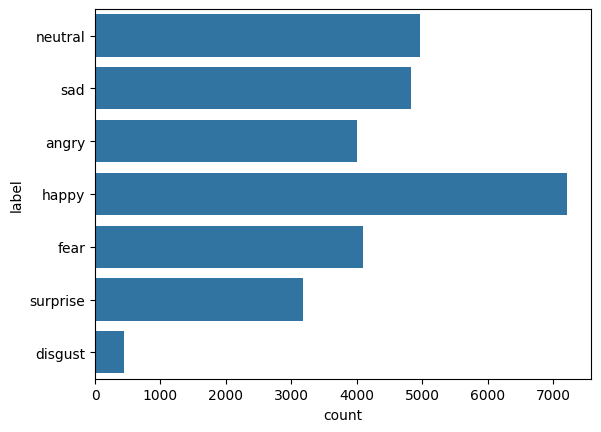

In [6]:
sns.countplot(train['label'])

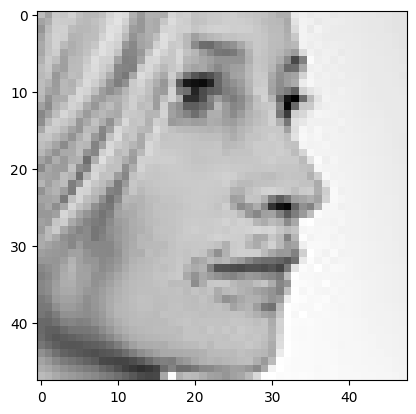

In [7]:
from PIL import Image
img=Image.open(train['image'][0])
plt.imshow(img,cmap='gray')

In [8]:
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import load_img


In [9]:
def extract_features(images):
    features=[]
    for image in tqdm(images):
        img=load_img(image,color_mode="grayscale")
        img=np.array(img)
        features.append(img)
    features=np.array(features) 
    features=np.reshape(features,(len(features),48,48,1))  
    return features 

In [10]:
train_features=extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

100%|██████████| 28709/28709 [00:25<00:00, 1108.68it/s]


In [11]:
test_features=extract_features(test['image'])

100%|██████████| 7178/7178 [00:05<00:00, 1281.28it/s]


In [12]:
x_train=train_features/255.0
x_test=test_features/255.0

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(train['label'])
y_train=le.transform(train['label'])
y_test=le.transform(test['label'])


In [14]:
y_train=tf.keras.utils.to_categorical(y_train,num_classes=7)
y_test=tf.keras.utils.to_categorical(y_test,num_classes=7)

In [15]:
input_shape=(48,48,1)
output_class=7

MODEL BUILDING 

In [16]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [17]:
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 336s 1s/step - accuracy: 0.2383 - loss: 1.8345 - val_accuracy: 0.2471 - val_loss: 1.8146
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 371s 2s/step - accuracy: 0.2497 - loss: 1.8179 - val_accuracy: 0.2549 - val_loss: 1.8077
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 388s 2s/step - accuracy: 0.2559 - loss: 1.8059 - val_accuracy: 0.2836 - val_loss: 1.7498
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 368s 2s/step - accuracy: 0.2875 - loss: 1.7379 - val_accuracy: 0.3580 - val_loss: 1.6610
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 377s 2s/step - accuracy: 0.3452 - loss: 1.6475 - val_accuracy: 0.4301 - val_loss: 1.4903
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 298s 1s/step - accuracy: 0.4009 - loss: 1.5391 - val_accuracy: 0.4496 - val_loss: 1.4319
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1712s 8s/step - accuracy: 0.4232 - loss: 1.4880 - val_accuracy: 0.4692 - val_loss: 1.3540
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 5642s 25s/step - accuracy: 0.4460 - loss: 1.4314

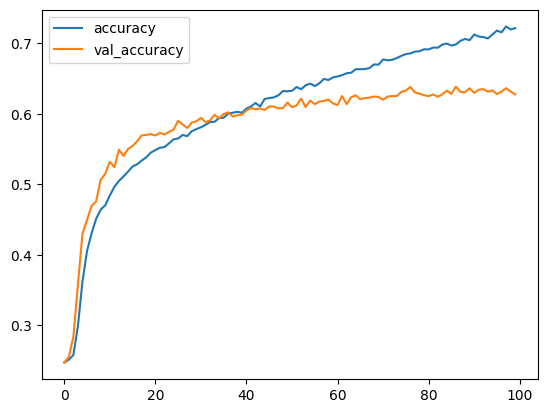

In [18]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epocks=range(len(acc))

plt.plot(epocks,acc,label='accuracy')
plt.plot(epocks,val_acc,label='val_accuracy')
plt.legend()
plt.show()  

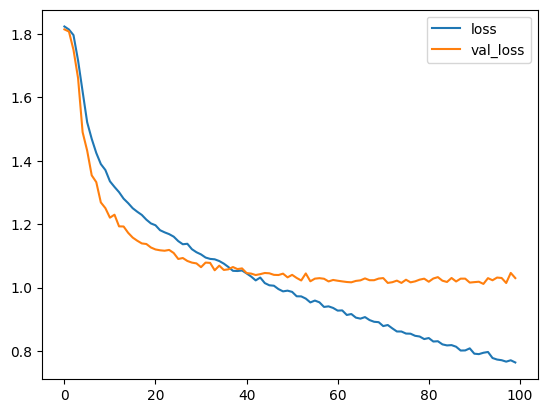

In [19]:
loss=history.history['loss']
val_loss=history.history['val_loss']    
epocks=range(len(acc))

plt.plot(epocks,loss,label='loss')
plt.plot(epocks,val_loss,label='val_loss')
plt.legend()    
plt.show()

Original Output: happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
Predicted Output: happy


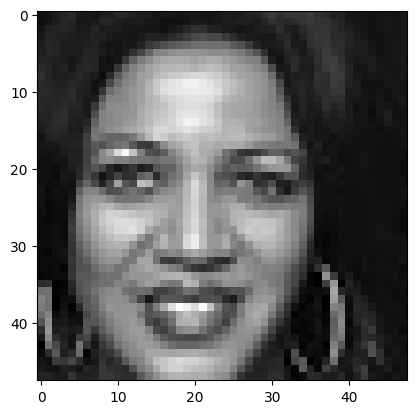

In [20]:
image_index =np.random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Predicted Output: happy


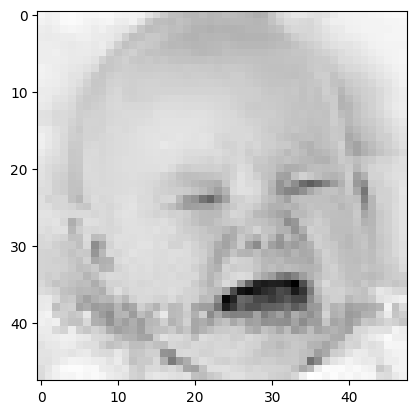

In [21]:
image_index =np.random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

In [22]:
model.save('emotion_detectionnn.keras')